# Serie de tiempo: Anomalías TSM en la región Niño 3.4 
## Conjunto de datos: ERSST V 5 

In [222]:
# Para omitir los mensajes de advertencia
import warnings 
warnings.filterwarnings("ignore")

In [223]:
import os
path = '/content/drive/MyDrive/Colab Notebooks/GRAFICAS_IOA/ONI-SOI-CORR/' 
os.chdir(path) 

In [224]:
#!pip install 'xarray == 0.19.0'
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [225]:
data_sst = xr.open_dataset(path + 'noaa.ersst.v5_sst.mnmean.nc', decode_times = False,drop_variables = ['time_bnds'])
data_sst

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 2027)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) float64 1.972e+04 1.975e+04 ... 8.136e+04 8.139e+04
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-12-04

# Cambiando el formato del tiempo a datetime64[ns] 

In [226]:
data_sst['time'] = pd.date_range('1854-01-01', '2022-11-01', freq = 'MS')

# Seleccionamos la Región Niño 3.4 

---
## Latitud: 5°S-5°N
## Longitud: 170°W-120°W

---
En este caso la longitud se encuentra desde 0° hasta 358° (2° de resolución) por lo que la longitud tomada será desde: 190° hasta 240° (que es el equivalente si restáramos 360° a 170°W y 120°W) 





In [227]:
sst_nino34 = data_sst.sel(lat=slice(5, -5), lon=slice(190, 240)).mean(['lat','lon']) # Promediamos las grillas para obtener una serie de tiempo
sst_nino34

<xarray.Dataset>
Dimensions:  (time: 2027)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2022-11-01
Data variables:
    sst      (time) float32 25.9 26.06 26.91 27.63 ... 25.87 25.64 25.72 25.79

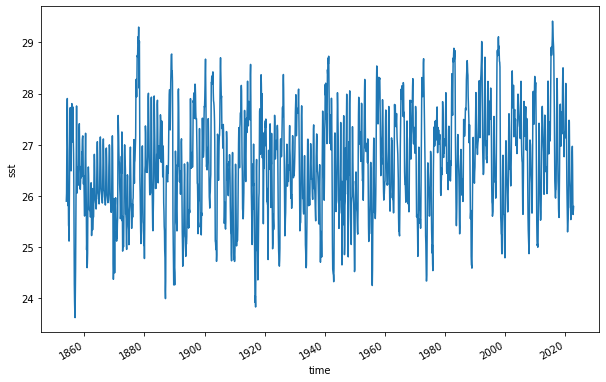

In [228]:
fig, ax = plt.subplots(figsize=(10, 6))
sst_nino34.sst.plot()

# Calculamos la climatología 

In [229]:
# Climatología actual: 1991-2020 
sst_clm_nino34 = sst_nino34.sel(time=slice('1991-01-01','2020-12-01')).groupby('time.month').mean(dim='time')
sst_clm_nino34

<xarray.Dataset>
Dimensions:  (month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month) float32 26.55 26.77 27.3 27.83 ... 26.72 26.72 26.7 26.6

# Calculamos las anomalías 

In [230]:
sst_anm_nino34 = (sst_nino34.groupby('time.month') - sst_clm_nino34)
sst_anm_nino34

<xarray.Dataset>
Dimensions:  (time: 2027)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2022-11-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12 ... 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    sst      (time) float32 -0.6557 -0.7092 -0.3878 ... -1.08 -1.0 -0.9116

# Antes de graficar vamos a obtener los valores de anomalías TSM desde 1950 hasta 2022.

In [231]:
anom_sst34 = sst_anm_nino34.sel(time=slice('1950-01-01','2022-12-01'))
anom_sst34

<xarray.Dataset>
Dimensions:  (time: 875)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-11-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12 ... 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    sst      (time) float32 -1.994 -1.697 -1.418 -1.539 ... -1.08 -1.0 -0.9116

# Graficamos 

In [232]:
import matplotlib.ticker as mticker,matplotlib.dates as mdates

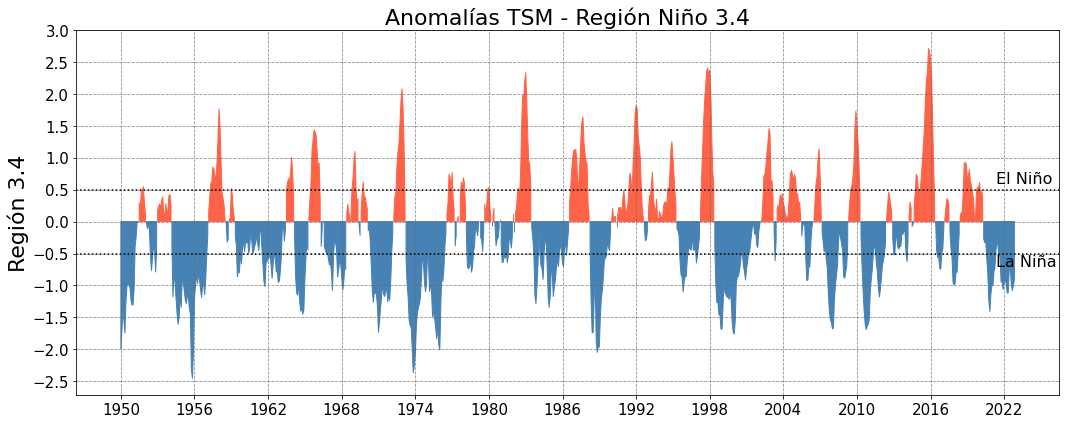

In [234]:
def Anom_R34(data1,data2,titulo):
  fig, ax = plt.subplots(figsize=(15, 6))

  ax.fill_between(data1, data2, where=data2 > 0, color='tomato')
  ax.fill_between(data1,data2, where=data2< 0, color='steelblue')

  ax.set_yticks(np.linspace(-2.5, 3, 12)),plt.xticks(fontsize = 15),plt.yticks(fontsize = 15),ax.set_ylabel('Región 3.4',fontsize = 22)
  ax.set_title(titulo, fontsize=22)

  ax.grid(axis='x', linestyle = '--', alpha = 0.75, color = 'dimgrey'),plt.axhline(0.5,color='black',linewidth=1.5,linestyle='dotted')
  ax.grid(axis='y', linestyle = '--', alpha = 0.75, color = 'dimgrey'),plt.axhline(-0.5,color='black',linewidth=1.5,linestyle='dotted')

  ax.xaxis.set_major_locator(mdates.YearLocator(6)) # CADA 5 AÑOS 
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # FORMATO DE LA FECHA  

  ax.text(737899,0.6, 'El Niño', fontsize=16) # Aquí solo hice un tanteo, no sé porque se desconfiguró xd 
  ax.text(737899,-0.7, 'La Niña', fontsize=16)

  plt.tight_layout()
  plt.show()
Anom_R34(anom_sst34.time.values,anom_sst34.sst.values,'Anomalías TSM - Región Niño 3.4')